<div style="border:solid purple 2px; padding: 20px">

Аня привет! 👋 Поздравляю с первым выполненным проектом 🙂
    
Меня зовут Рустам Муртазин, и я буду делать ревью проектной работы по предобработке данных. Давай будем общаться на **«ты»**. Если это неприемлемо, обязательно напиши мне в комментариях — мы перейдем на **«вы»**.

Ты проделала большую работу над проектом, однако в любом деле всегда можно можно что-то улучшить. Моя основная цель — не показать, что где-то совершены какие-либо ошибки, а поделиться своим опытом, который поможет тебе в дальнейших работах. Далее в файле ты сможешь увидеть мои комментарии, постарайся учесть их при выполнении следующих заданий.    

Обрати внимание в первую очередь на те, что помечаны <span style="color:red">красным цветом</span>. После их доработки проект будет принят. <span style="color:green">Зеленым цветом</span> отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. <span style="color:orange">Оранжевым цветом</span> выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: если ты **что-то меняешь** в проекте по моим рекомендациям — **пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее».

У тебя получилась отличная работа, особенно для первого проекта. Ты показываешь прекрасное владение изучаемым материалом: уверенно пользуешься pandas, умеешь подготавливать, очищать, обогощать данные.  На протяжении всей работы чувствуется глубина проработки задачи и это безусловный плюс для нас.

Как ни старался, критичных проблем я не нашел, ты точно готова идти дальше. Успехов в дальнейшем порхождении курса! 😊

<div>

## Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [27]:
import pandas as pd
data = pd.read_csv('/Users/makbook_hanna_lavrinovich/Documents/Яндекс Практикум/2 Предобработка данных/data.csv')
#data = pd.read_csv('/datasets/data.csv')
pd.set_option('display.float_format', lambda x: '%.5f' % x)
data.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.67303,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.63945,покупка жилья
1,1,-4024.80375,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.01410,приобретение автомобиля
2,0,-5623.42261,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.95230,покупка жилья
3,3,-4124.74721,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.55033,дополнительное образование
4,0,340266.07205,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.07787,сыграть свадьбу


Смотрю общую информацию:

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [29]:
data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.00000,19351.00000,21525.00000,21525.00000,21525.00000,21525.00000,19351.00000
mean,0.53891,63046.49766,43.29338,0.81724,0.97254,0.08088,167422.30221
std,1.38159,140827.31197,12.57458,0.54814,1.42032,0.27266,102971.56645
min,-1.00000,-18388.94990,0.00000,0.00000,0.00000,0.00000,20667.26379
25%,0.00000,-2747.42363,33.00000,1.00000,0.00000,0.00000,103053.15291
50%,0.00000,-1203.36953,42.00000,1.00000,0.00000,0.00000,145017.93753
75%,1.00000,-291.09595,53.00000,1.00000,1.00000,0.00000,203435.06766
max,20.00000,401755.40048,75.00000,4.00000,4.00000,1.00000,2265604.02872


### Вывод

По общей информации о данных становится понятно следующее:

* Как минимум в 2 колонках есть пропуски в данных - это total_income и days_employed. Не все желают делиться данными о своих доходах, даже с банком :)
* В колонке days_employed есть отрицательные и аномально большие значения. Это может значить, что даты принятия на работу были указаны неверно, либо неподходящим образом для методологии вычисления этого поля(например, сначала дата увольнения, потом дата приёма на работу).
* Есть записи, у которых значение в колонке children - отрицательные. Это тоже можно рассматривать по разному - либо как ошибку ввода, либо как "тире 1". Чтобы сделать какие-то более конкретные выводы, необходимо изучить данные в остальных колонках для этих строк. Так же подозрительно выглядит значение children = 20
* Есть значение 0 в колонке возраст - часть клиентов не указала свой возраст (0.4%). Так как в задаче не стоит прямой вопрос о влиянии непосредственно возраста, то оставлю эти записи как есть, потому что для них есть данные в других столбцах, которые важны для ответа на поставленные вопросы.
* В колонках education и purpose содержаться категории, одинаковые по смыслу, но не идентичные по написанию. Нужно выделить общие категории и применить их ко всему набору данных.
* В колонке gender присутствует 1 пропуск. Так как в задаче не стоит прямой вопрос о влиянии непосредственно пола, то оставлю эту запись как есть.



### Шаг 2. Предобработка данных

### Обработка пропусков

Из предыдущего шага я знаю, что пропуски содержатся в колонках days_employed и total_income.
Выделю значения с пропущенным days_employed в отдельный датафрейм и проверю, что в него попали все значения с пропущенным total_income (так как предполагаю, что эти пропуски связаны).

In [30]:
unemployed = data[data['days_employed'].isnull()== True]

In [31]:
unemployed[unemployed['total_income'].isnull() == False] 

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


Посчитаю % данных с пропусками от всех данных:

In [32]:
print('{:.1%}'.format(len(unemployed)/len(data)))

10.1%


% пропуска достаточно велик, поэтому нельзя удалить эти записи. Буду заменять их медианным значением, рассчитанным для каждого различного типа дохода (чтобы разделить все данные на группы и получить медианы, более точно описывающие группу).

Перед тем, как считать медианы, изучим данные в соотвествующих столбцах.

Из предыдущего шага видно,что данные столбца total_income не имеют каких-то аномальных значений, которые бы бросались в глаза.

А вот с колонкой days_employed предварительно придется поработать.

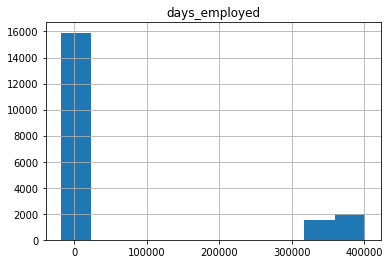

In [33]:
data.hist(column='days_employed');

<div class="alert alert-warning">
<h2> Комментарий ревьюера </h2>

Молодец, что визуализируешь данные, однако не забывай указывать заголовки и названия осей на графиках. Это необходимо для того, чтобы понять какие именно показатели отображены на графиках.

</div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера </h2>

Для того, чтобы не показывать вспомогательные выводы python типа `<matplotlib.axes._subplots.AxesSubplot at 0x7f5feaf7fc90>`, можно в конце строки добавить точку с запятой или `plt.show()` 😉

</div>

На гистограмме можно увидеть 2 проблемы с данными в столбце days_employed:
* Присутствуют аномально большие значения (более 800 лет трудового стажа)
* Имеются отрицательные значения

Сначала смотрю на данные с аномально большими значениями:

In [34]:
data[data['days_employed'] > 300000]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
4,0,340266.07205,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.07787,сыграть свадьбу
18,0,400281.13691,53,среднее,1,вдовец / вдова,2,F,пенсионер,0,56823.77724,на покупку подержанного автомобиля
24,1,338551.95291,57,среднее,1,Не женат / не замужем,4,F,пенсионер,0,290547.23600,операции с коммерческой недвижимостью
25,0,363548.48935,67,среднее,1,женат / замужем,0,M,пенсионер,0,55112.75773,покупка недвижимости
30,1,335581.66851,62,среднее,1,женат / замужем,0,F,пенсионер,0,171456.06799,операции с коммерческой недвижимостью
...,...,...,...,...,...,...,...,...,...,...,...,...
21505,0,338904.86641,53,среднее,1,гражданский брак,1,M,пенсионер,0,75439.99317,сыграть свадьбу
21508,0,386497.71408,62,среднее,1,женат / замужем,0,M,пенсионер,0,72638.59092,недвижимость
21509,0,362161.05412,59,высшее,0,женат / замужем,0,M,пенсионер,0,73029.05938,операции с недвижимостью
21518,0,373995.71084,59,СРЕДНЕЕ,1,женат / замужем,0,F,пенсионер,0,153864.65033,сделка с автомобилем


In [35]:
data[data['days_employed'] > 300000]['income_type'].unique()

array(['пенсионер', 'безработный'], dtype=object)

Интересный факт, что подобные данные встречаются только для следующих типов занятости: пенсионер и безработный.
    
Проверю, есть ли данные других порядков для этих типов занятости, чтобы подтвердить свою гипотезу о том, что аномалии характерны именно для этих 2 категорий граждан.

In [36]:
data[data['days_employed'] < 300000]['income_type'].unique()

array(['сотрудник', 'компаньон', 'госслужащий', 'студент',
       'предприниматель', 'в декрете'], dtype=object)

Ура, первая гипотеза подтвердилась.

У меня есть предположение, что значения такие большие для этих 2 категорий граждан, потому что стаж тут указан не в часах, а в минутах. Попробую перевести его из часов (по моему предположению) в годы и посмотрю на результаты:

1. Добавлю колонку years_employed, которая будет содержать стаж в годах из предположения, что в колонке days_employed он отображается в часах

2. Сравню полученный стаж с возрастом, чтобы оценить правдивость гипотезы

In [37]:
test = data[data['days_employed'] > 300000].reset_index()
test['years_employed'] = test['days_employed']/(24*365)
test['working_age'] = test['years_employed'] - test['dob_years']

<div class="alert alert-warning">
<h2> Комментарий ревьюера </h2>

При выполнении ячейки выше выходит предупреждение `SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame`, подсвеченное розовым цветом (а значит, оно важно для качества кода). Дело в том, что при вычислении новых столбцов используется цепное индексирование (т.е функция выполняется для каждого индекса), а в твоем случае, датафрейм имеет непоследовательную индексацию. Решить проблему позволит:
- сбрасывание индексов датафрейма, можно использовать [reset_index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html)
- использование [loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) и [iloc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html)
- можно отключить данное предупреждение прописав `pd.options.mode.chained_assignment = None` перед исполненем ячейки 😉

</div>

In [38]:
test.head(5)

,index,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,working_age
0,4,0,340266.07205,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.07787,сыграть свадьбу,38.84316,-14.15684
1,18,0,400281.13691,53,среднее,1,вдовец / вдова,2,F,пенсионер,0,56823.77724,на покупку подержанного автомобиля,45.69419,-7.30581
2,24,1,338551.95291,57,среднее,1,Не женат / не замужем,4,F,пенсионер,0,290547.23600,операции с коммерческой недвижимостью,38.64748,-18.35252
3,25,0,363548.48935,67,среднее,1,женат / замужем,0,M,пенсионер,0,55112.75773,покупка недвижимости,41.50097,-25.49903
4,30,1,335581.66851,62,среднее,1,женат / замужем,0,F,пенсионер,0,171456.06799,операции с коммерческой недвижимостью,38.30841,-23.69159


Вижу, что гипотеза об отображении рабочего стажа в часах для безработных и пенсионеров оказалась неверной: полученный при таком предположении стаж превышает возраст.

Других гипотез возникновений аномалий у меня нет, поэтому принимаю решение оставить эти значения такими: да, они очень велики, то только для 2 определенных типов занятости, которые не содержат не аномально большие значения. То есть буду просто считать, что для них стаж указан в каких-то неизвестных мне единицах измерения. Но так как он характерен для этих двух типов занятости, большие медианные значения для них не повлияют на медианы для других типов занятости и не исказят их.

Теперь посмотрим на отрицательные значения в столбце days_employed. Есть гипотеза, что так вышло из-за того, что даты начала и конца трудового стажа указаны были в неправильном порядке и поэтому при вычислении длительности стажа в днях образовались отрицательные значения.
Они могут повлиять на медианные значения. Поэтому перед тем, как сделать какие-то расчеты, нужно избавиться от отрицательного стажа, если это возможно.

Чтобы проверить свою гипотезу о возникновении трудового стажа, я проверю доход в таких записях. Если он не отрицательный и не нулевой, заменю отрицательный стаж на его значение по модулю.

In [39]:
data[data['days_employed'] < 0].describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,15906.00000,15906.00000,15906.00000,15906.00000,15906.00000,15906.00000,15906.00000
mean,0.62599,-2353.01593,39.81824,0.79838,0.96963,0.08733,173984.43519
std,1.43057,2304.24385,10.66317,0.55484,1.44226,0.28232,106130.29174
min,-1.00000,-18388.94990,0.00000,0.00000,0.00000,0.00000,21367.64836
25%,0.00000,-3157.48008,32.00000,0.00000,0.00000,0.00000,108271.34329
50%,0.00000,-1630.01938,39.00000,1.00000,0.00000,0.00000,151134.59348
75%,1.00000,-756.37196,48.00000,1.00000,1.00000,0.00000,211494.41556
max,20.00000,-24.14163,75.00000,4.00000,4.00000,1.00000,2265604.02872


In [40]:
data[data['days_employed'] < 0]['total_income'].min()

21367.648356486974

Минимальный доход для записи с отрицательным стажем составил 21367, что явно отлично от нуля.

Буду считать это основанием для замены всех days_employed < 0 на abs(days_employed) 

In [41]:
data['days_employed'] = data['days_employed'].abs()

Теперь можно наконец приступить к заполнению пропусков. 

Буду заменять пропусти в колонках days_employed и total_income на медианные значения, посчитанные для каждого income_type:

Создаю функцию для заполнения пропусков и применяю к датафрейму:

In [53]:
data['total_income'] = data.groupby('income_type')['total_income'].apply(lambda x: x.fillna(x.median()))
data['days_employed'] = data.groupby('income_type')['days_employed'].apply(lambda x: x.fillna(x.median()))

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Хорошая реализация! Вот еще один вариант, как можно было сделать замену, но уже не используя циклы 😉
    
    data['total_income'] = data.groupby('income_type')['total_income'].apply(lambda x: x.fillna(x.median()))

</div>

Убеждаюсь, что все пропуски заполнены:

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21449 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21449 non-null  int8   
 1   days_employed     21449 non-null  float64
 2   dob_years         21449 non-null  int64  
 3   education         21449 non-null  object 
 4   education_id      21449 non-null  int64  
 5   family_status     21449 non-null  object 
 6   family_status_id  21449 non-null  int64  
 7   gender            21449 non-null  object 
 8   income_type       21449 non-null  object 
 9   debt              21449 non-null  int64  
 10  total_income      21449 non-null  float64
 11  purpose           21449 non-null  object 
dtypes: float64(2), int64(4), int8(1), object(5)
memory usage: 2.0+ MB


### Вывод

При наличие пропусков на достачно большом проценте данных, стоит заменить их на медианные значения. Если есть возможность, то считать медианные значения не по всему датафрейму, а разделить его предварительно на категории.

Однако, стоит быть очень внимательным перед тем как считать медиану - необходимо изучить столбец на наличие аномальных или противоречящих логике значений, которые могут исказить значение медианы.
Необходимо детальнее изучить данные с аномалиями и попробовать установить причину их возникновения.

Некоторые гипотезы  могут подтвердиться и тогда можно избавиться от части аномалий.

Какие-то гипотезы не подтвердятся и аномальные значения останутся в исходном датасете - тогда следует внимательно изучить природу данных, содержащих аномалии - возможно, они не повлияют на основной массив данных и не все так плохо.

После того, как данные изучены и приведены к "приличному" состоянию, можно смело рассчитывать медиану и заменять ей пропуски. И напоследок не забыть проверить, что пропусков действительно больше нет.

### Замена типа данных

В конце прошлого шага я вызывала метод info(), в котором содержится информация о типах данных всех колонок.
Теперь я буду детальнее изучать данные и приводить тип для всх колонок по порядку.

Начну со столбца children. Он содержит информацию о количестве детей в семье, поэтому логично, чтобы он имел целочисленный тип integer.
Смотрю значения:

In [55]:
data['children'].value_counts()

0    14149
1     4865
2     2055
3      330
4       41
5        9
Name: children, dtype: int64

Вижу, что есть артефакты: children = 20 и children = -1.
Изучу данные подробнее:

In [56]:
data[data['children'] == 20]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


In [57]:
print('{:.1%}'.format(len(data[data['children'] == 20])/len(data)))

0.0%


In [58]:
data[(data['children'] == -1)].describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
mean,nan,nan,nan,nan,nan,nan,nan
std,nan,nan,nan,nan,nan,nan,nan
min,nan,nan,nan,nan,nan,nan,nan
25%,nan,nan,nan,nan,nan,nan,nan
50%,nan,nan,nan,nan,nan,nan,nan
75%,nan,nan,nan,nan,nan,nan,nan
max,nan,nan,nan,nan,nan,nan,nan


В случае значения children = -1 есть преположение, что имелось в виду "тире 1". Поэтому в этом случае заменим отрицательное значение -1 на 1.
Поле children = 20 тоже может быть ошибкой, но так как процент данных с такими значениями невелик (0.4%), то считаю, что его удаление не приведет к значительному искажению общей выборки.

Так же столбец с количеством детей можно привести к типу int8 абсолютно без потери данных и позволит сократить используемую память.

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Согласен
    
</div>

In [59]:
data['children'] = data['children'].abs().astype('int8')
data = data[data['children'] != 20]

Дальше смотрю на колонки days_employed и сразу total_income. С ними я работала на прошлом шаге, поэтому знаю, что они содержат неотрицательные значения с плавающей точкой и не содержат пропусков. Так как для данных колонок количество знаков после запятой для нас не принципиально, изменяю их на целочисленный тип. 


Столбец dob_years так же привожу к типу int8, чтобы сократить количетво потребляемой памяти. Такие же преобразования применяю к колонкам: education_id и family_status_id.
И напоследок приведем тип колонки debt к int8. Там содержаться только булевы значения 0 и 1, но я не хочу менять их на тип bool, чтобы не потерять возможность использовать математические операции над этой колонкой. Но в целях экономии памяти вполне можно привести к int8.
Выбрала приведение к типу int8 так как значения в приводимых столбцах ограничены, и мы сократим потребление памяти без утери значений.

In [60]:
data['days_employed'] = data['days_employed'].astype('int')
data['total_income'] = data['total_income'].astype('int')
data['dob_years'] = data['dob_years'].astype('int8')
data['education_id'] = data['education_id'].astype('int8')
data['family_status_id'] = data['family_status_id'].astype('int8')
data['debt'] = data['debt'].astype('int8')

<div class="alert alert-warning">
<h2> Комментарий ревьюера </h2>

А здесь прям напрашиваются циклы
    
</div>

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21449 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21449 non-null  int8  
 1   days_employed     21449 non-null  int64 
 2   dob_years         21449 non-null  int8  
 3   education         21449 non-null  object
 4   education_id      21449 non-null  int8  
 5   family_status     21449 non-null  object
 6   family_status_id  21449 non-null  int8  
 7   gender            21449 non-null  object
 8   income_type       21449 non-null  object
 9   debt              21449 non-null  int8  
 10  total_income      21449 non-null  int64 
 11  purpose           21449 non-null  object
dtypes: int64(2), int8(5), object(5)
memory usage: 1.4+ MB


### Вывод

На этом шаге удалось сделать 2 вещи:
* Привести данные к более удобному для дальнейшей работы внешнему виду (преобразовать вещественный тип в целочисленный)
* Сократить объем потребляемой памяти на 25%

При этом не стоит забывать, что перед приведением типов следует внимательно изучить данные приводимых столбцов и убедиться, что там нет аномалий, к которым будет чувствительно приведение и что приведение типа не повлияет негативно в дальнейшей работе.

### Обработка дубликатов

Перед тем, как искать дубликаты, вспомню, что на ранних этапах видела дубликаты, написанные в разных регистрах в колонке education. Больше таких колонок нет.

Приведу её к нижнему регистру и посмотрю на количество дубликатов.

In [62]:
data['education'] = data['education'].str.lower()

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Молодец, что приводишь данные к общему виду и делаешь это до удаления дубликатов, ведь это может повлиять на их кол-во

</div>

In [63]:
data.duplicated().sum()

71

In [64]:
print('{:.1%}'.format(71/len(data)))

0.3%


Вижу, что значения не уникальны. 

Дубликаты составляют 0.3% от всего датасета, поэтому удалю их. После проверю, что дубликатов больше не осталось.


In [65]:
data = data.drop_duplicates().reset_index()

In [66]:
data.duplicated().sum()

0

### Вывод

На этом этапе я поработала с 2 типами дубликатов:
* полные смысловые дубликаты, которые отличаются лишь регистром
* дублирование всех строк датафрейма

Сначала нужно привести к общему виду все смысловые дубликаты (путем приведения их к общему регистру) и только потом заниматься подсчетом и обработкой дубликатов на уровне всего датафрейма.

В моем случае дубликаты составляли 0.3% от всего объема данных, поэтому было принято решение их удалить.

### Лемматизация

Взгляну подробнее на значения, которые содержит в себе колонка purpose:

In [70]:
data['purpose'].value_counts()

свадьба                                   790
на проведение свадьбы                     764
сыграть свадьбу                           761
операции с недвижимостью                  674
покупка коммерческой недвижимости         658
покупка жилья для сдачи                   650
операции с жильем                         648
операции с коммерческой недвижимостью     646
покупка жилья                             643
жилье                                     642
покупка жилья для семьи                   637
недвижимость                              632
строительство собственной недвижимости    629
операции со своей недвижимостью           626
строительство жилой недвижимости          623
покупка своего жилья                      620
строительство недвижимости                619
покупка недвижимости                      619
ремонт жилью                              605
покупка жилой недвижимости                604
на покупку своего автомобиля              505
заняться высшим образованием      

Видно, что очень многие категории схожи, но написаны разными словами. Чтобы на следующем шаге успешно разделить все цели для кредита на несколько крупных категорий, необходимо произвести лемматизацию данных в колонке purpose.

Создам новую колонку, в которую результат лемматизации для колонки purpose.

In [71]:
from pymystem3 import Mystem
m = Mystem()
from collections import Counter

In [72]:
data['purpose_lem'] = data['purpose'].apply(lambda x:  ''.join(m.lemmatize(x)))

In [73]:
lemmas_list = data['purpose_lem'].value_counts().index.to_list()
lemmas_list

['автомобиль\n',
 'свадьба\n',
 'на проведение свадьба\n',
 'сыграть свадьба\n',
 'операция с недвижимость\n',
 'покупка коммерческий недвижимость\n',
 'покупка жилье для сдача\n',
 'операция с жилье\n',
 'операция с коммерческий недвижимость\n',
 'покупка жилье\n',
 'жилье\n',
 'покупка жилье для семья\n',
 'недвижимость\n',
 'строительство собственный недвижимость\n',
 'операция со свой недвижимость\n',
 'строительство жилой недвижимость\n',
 'покупка свой жилье\n',
 'строительство недвижимость\n',
 'покупка недвижимость\n',
 'ремонт жилье\n',
 'покупка жилой недвижимость\n',
 'на покупка свой автомобиль\n',
 'заниматься высокий образование\n',
 'сделка с подержанный автомобиль\n',
 'свой автомобиль\n',
 'на покупка подержать автомобиль\n',
 'на покупка автомобиль\n',
 'приобретение автомобиль\n',
 'дополнительный образование\n',
 'сделка с автомобиль\n',
 'высокий образование\n',
 'получение дополнительный образование\n',
 'образование\n',
 'получение образование\n',
 'профильный об

Этот список я лемматизирую ещё раз и подсчитаю количество вхождений, чтобы определить ключевые слова, по которым буду на следующем шаге строить категории.
Так как в данном датасете вариативность не очень большая, то оcновные категории можно выделить и без этого шага, но мне хочется его проделать тоже.

In [74]:
lemmas_list = pd.Series(lemmas_list)
lemmas_list = lemmas_list.apply(lambda x: x.replace('\n',' '))
lemmas_list = lemmas_list.sum()
lemmas = m.lemmatize(lemmas_list)
print(Counter(lemmas))

Counter({' ': 95, 'недвижимость': 10, 'покупка': 10, 'образование': 9, 'автомобиль': 8, 'жилье': 7, 'с': 5, 'на': 4, 'операция': 4, 'свой': 4, 'свадьба': 3, 'строительство': 3, 'высокий': 3, 'получение': 3, 'коммерческий': 2, 'для': 2, 'жилой': 2, 'заниматься': 2, 'сделка': 2, 'дополнительный': 2, 'проведение': 1, 'сыграть': 1, 'сдача': 1, 'семья': 1, 'собственный': 1, 'со': 1, 'ремонт': 1, 'подержанный': 1, 'подержать': 1, 'приобретение': 1, 'профильный': 1, ' \n': 1})


<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Жирный плюс! Это один из сложнейших этапов проекта, справилась на отлично

</div>

На основании полученных результатов могу сформировать следующие категории, на которые буду делить цели кредитования на следующем этапе:
* недвижимость (сюда будет относиться цели содежржащие леммы жилье, недвижимость)
* образование
* автомобиль
* свадьба

### Вывод

На этом этапе я лемматизировала колонку, содержащую данные о целях кредита и подсчитала количество вхождений каждой леммы.

Это помогло мне выделить 4 основные типа целей выдачи кредита, используя которые, я смогу категоризировать данные на следующем шаге.

### Категоризация данных

Чтобы ответить на вопросы 3 шага, нужно категоризировать все данные:
1. По наличию детей
2. По семейному положению
3. По уровню дохода
4. По цели кредита

In [75]:
data.drop(columns = 'index', inplace = True)

In [76]:
data['purpose_cat'] = ''

In [77]:
#функция для категоризации по наличию детей 
def children(x):
    if x > 0:
        return 1
    return 0

In [78]:
#функция для категоризации по целям кредита
def purpose(d):
    try:
        d.loc[d['purpose_lem'].str.contains('жилье') == True,'purpose_cat'] = 'недвижимость'
        d.loc[d['purpose_lem'].str.contains('недвижимость') == True,'purpose_cat'] = 'недвижимость'
        d.loc[d['purpose_lem'].str.contains('образование') == True,'purpose_cat'] = 'образование'
        d.loc[d['purpose_lem'].str.contains('свадьба') == True,'purpose_cat'] = 'свадьба'
        d.loc[d['purpose_lem'].str.contains('автомобиль') == True,'purpose_cat'] = 'автомобиль'
    except:
        print('Проблема категоризации!')
    return

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Здорово, что ты используешь конструкцию `try-except`, это повышает отказоустойчивость кода

</div>

In [79]:
purpose(data)
data['children_cat'] = data['children'].apply(children)

Посмотрим на уровни дохода, чтобы понять, как можно распределить категории:

In [80]:
data['total_income'].describe()

count     21378.00000
mean     165316.19118
std       98257.35605
min       20667.00000
25%      107528.75000
50%      142594.00000
75%      195795.50000
max     2265604.00000
Name: total_income, dtype: float64

In [81]:
data['total_income'].median()

142594.0

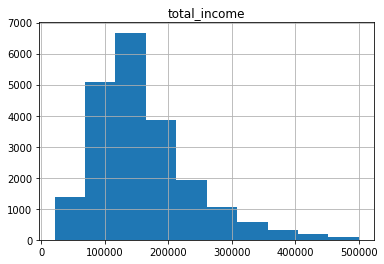

In [82]:
data[data['total_income']<500000].hist(column = 'total_income');

Основываясь на распределении данных этого столбца категоризирую уровень дохода по перцинтилям:


In [86]:
data['income_cat'] = pd.qcut(data['total_income'],3, labels=["низкий", "средний", "высокий"])

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Здесь, кстати для деления по доходу можно было применить метод [cut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html) или [qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)(в этом случае деление будет проводиться по проценилям). Обрати внимание, у данного метода есть параметр `labels`, так можно оформить группы красивее 😊

</div>

### Вывод

Я разбила все данные по более общим категориям, которые мне необходимы для ответов на поставленные вопросы.


### Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

Отвечать на вопрос буду при помощи вычисления %должников для каждой категории:

In [94]:
children_data = data.pivot_table(index = ['children_cat'], values = 'debt', aggfunc = {'count','sum','mean'})
children_data.style.format({'mean': '{:.2%}'})

,count,mean,sum
children_cat,,,
0,14091.000000,7.54%,1063.000000
1,7287.000000,9.19%,670.000000


<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Супер, молодец, что пользуешься `pivot_table`. Здесь можно было выполнить короче, для этого  в `aggfunc` задавай дополнительно `mean`

</div>

### Вывод

Различия в % должников для клиентов имеющих и не имеющих детей составляет около 1.5%, поэтому нельзя сказать, что существует взаимосвязь между наличием детей и возвратом кредита в срок.

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [93]:
family_data = data.pivot_table(index = ['family_status'], values = 'debt', aggfunc = {'count','sum','mean'})
family_data.style.format({'mean': '{:.2%}'})

,count,mean,sum
family_status,,,
Не женат / не замужем,2801.000000,9.75%,273.000000
в разводе,1193.000000,7.04%,84.000000
вдовец / вдова,955.000000,6.60%,63.000000
гражданский брак,4139.000000,9.30%,385.000000
женат / замужем,12290.000000,7.55%,928.000000


<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

У тебя отличная работа!
    
Может тебе будет интересно: для улучшения визуализации датафрейма, можно пользоваться [style](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html) библиотеки `pandas`. Там много прикольных штук для того, чтобы сделать датафрейм красивее 😊
Например, в нашем случае, чтобы выводить результат в процентах, а не в долях, можно прописать следующее:
    
`family_data.style.format({'debtors': '{:.2%}'})`  
    
</div>

### Вывод

Основываясь на полученных данных нельзя сказать, что есть зависимость между семейным положением и возвратом кредита в срок.

Однако, можно сказать, что вдовцы\вдовы, реже имеют задолженности перед банком, чем, например, не женатые\не замужние. 

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [95]:
income_data = data.pivot_table(index = ['income_cat'], values = 'debt', aggfunc = {'count','sum','mean'})
income_data.style.format({'mean': '{:.2%}'})

,count,mean,sum
income_cat,,,
низкий,7126.000000,8.14%,580.000000
средний,7260.000000,8.65%,628.000000
высокий,6992.000000,7.51%,525.000000


### Вывод

Основываясь на полученных данных, нельзя сказать, что есть зависимость между уровнем дохода и возратом кредита в срок.

Из полученных даных можно лишь сделать вывод, что % должников с высоким уровнем дохода меньше, чем % должников с низким и средним уровнями дохода.

- Как разные цели кредита влияют на его возврат в срок?

In [96]:
purpose_data = data.pivot_table(index = ['purpose_cat'], values = 'debt', aggfunc = {'count','sum','mean'})
purpose_data.style.format({'mean': '{:.2%}'})

,count,mean,sum
purpose_cat,,,
автомобиль,4290.000000,9.35%,401.000000
недвижимость,10775.000000,7.24%,780.000000
образование,3998.000000,9.23%,369.000000
свадьба,2315.000000,7.90%,183.000000


### Вывод

Основываясь на полученных данных можно увидеть, что кредит на недвижимость чаще всего возвращается в срок.

Следом за ним идет кредит на свадьбу.

А вот выплаты по кредитам за автомобиль и образорвание чуть чаще задерживают.

### Шаг 4. Общий вывод

Для того, чтобы ответить на вопросы, использовалось 99% предоставленных данных.

В ходе предобработки были обнаружены (и удалены) дубликаты, исправлены "артефактные" значения. Пропуски были заменены на медианные значение по типу занятости.

Все цели получения кредита были разбиты на 4 основные группы и данные категоризировались по этим 4 группам.

Однако, по результатам полученным в ходе исследования, нельзя сказать, что наличие детей, семейное положение, уровень дохода и цель кредита значимо влияют на его возврат в срок.

Однако, в качестве направления для исследования вижу возможность добавления образования для вычисления медианных значений для пропусков. 
Тогда, ввероятно, доходы у населения распределятся иначе и можно будет заметить более явное влияние. Так же бы не помешала консультация со стороны бизнеса о том, как категоризировать доходы населения ( какие считать низкими, а какие высокими).

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Хороший вывод, мне нравится
    
</div>

### Вопросы

При заполнении пропусков медианами я хотела рассчитывать её по следующим категориям: income_type, education.
Однако,при таком подходе попадались группы, где 6 пропусков полагалось заполнить медианой, посчитанной на 2 значениях. То есть заполнть 75% данных медианой, посчитанной на 25%. Это меня смутило и в итоге заставило отказаться от такого подхода.

Но хотелось бы узнать, когда группа, медианным значением которой я хочу заполнить пропуски, считается репрезентативной?

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Согласен, что считать медиану на двух значениях не совсем корректно. При этом какого-то конкретного ответа на твой вопрос нет, тут выбор остается за аналитиком. Я бы например объединил группы с небольшим количеством значений в одну и считал медиану по ним. 
    
</div>

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл;
- [x]  файл изучен;
- [x]  определены пропущенные значения;
- [x]  заполнены пропущенные значения;
- [x]  есть пояснение, какие пропущенные значения обнаружены;
- [x]  описаны возможные причины появления пропусков в данных;
- [x]  объяснено, по какому принципу заполнены пропуски;
- [x]  заменен вещественный тип данных на целочисленный;
- [x]  есть пояснение, какой метод используется для изменения типа данных и почему;
- [x]  удалены дубликаты;
- [x]  есть пояснение, какой метод используется для поиска и удаления дубликатов;
- [x]  описаны возможные причины появления дубликатов в данных;
- [x]  выделены леммы в значениях столбца с целями получения кредита;
- [x]  описан процесс лемматизации;
- [x]  данные категоризированы;
- [x]  есть объяснение принципа категоризации данных;
- [x]  есть ответ на вопрос: "Есть ли зависимость между наличием детей и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Есть ли зависимость между семейным положением и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Есть ли зависимость между уровнем дохода и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Как разные цели кредита влияют на его возврат в срок?";
- [x]  в каждом этапе есть выводы;
- [x]  есть общий вывод.